# 1. Install and Import Dependencies

In [2]:
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
!pip install yolov5


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!cd yolov5 & pip install -r requirements.txt


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\MR ASISH/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-11-17 Python-3.13.7 torch-2.9.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [8]:
img = 'https://media.istockphoto.com/id/1307527527/photo/city-traffic-in-india.jpg?s=612x612&w=0&k=20&c=VnlG3304Sl8DJEfC6nByDrh8gp0mECajbyVeZ8F1fbI='

In [9]:
results = model(img)
results.print()

C:\Users\MR ASISH/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 459x612 1 person, 21 cars, 11 buss, 2 trucks
Speed: 814.9ms pre-process, 211.1ms inference, 26.9ms NMS per image at shape (1, 3, 480, 640)


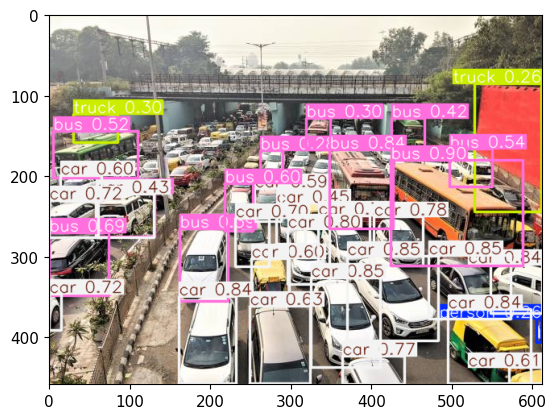

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
results.render()

[array([[[230, 231, 217],
         [237, 238, 224],
         [241, 242, 228],
         ...,
         [103,  92,  70],
         [112, 101,  79],
         [110,  99,  77]],
 
        [[241, 242, 228],
         [248, 249, 235],
         [252, 253, 239],
         ...,
         [110,  99,  77],
         [119, 108,  86],
         [108,  97,  75]],
 
        [[244, 245, 231],
         [250, 251, 237],
         [254, 255, 241],
         ...,
         [121, 110,  90],
         [119, 108,  88],
         [104,  93,  73]],
 
        ...,
 
        [[105,  88,  42],
         [153, 139,  94],
         [119, 101,  63],
         ...,
         [246, 225, 154],
         [247, 232, 188],
         [243, 243, 243]],
 
        [[144, 130,  83],
         [202, 189, 144],
         [172, 157, 118],
         ...,
         [243, 243, 243],
         [243, 243, 243],
         [243, 243, 243]],
 
        [[159, 147,  99],
         [234, 223, 177],
         [214, 200, 161],
         ...,
         [243, 243, 243],
  

# 4. Real Time Detections

In [12]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\MR ASISH/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\MR ASISH/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\MR ASISH/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\MR ASISH/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\MR ASISH/.cache\torch\hub\ultralytics_yolov

# 5. Train from scratch

In [13]:
import uuid   # Unique identifier
import os
import time

In [14]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [15]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [40]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.2e632478-c34d-11f0-b778-c0b5d7c3d0cc.jpg


In [41]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.30323668-c34d-11f0-8f17-c0b5d7c3d0cc.jpg
data\images\awake.30323b8e-c34d-11f0-a097-c0b5d7c3d0cc.jpg
data\images\awake.30323f65-c34d-11f0-b711-c0b5d7c3d0cc.jpg
data\images\awake.303242ee-c34d-11f0-b0b2-c0b5d7c3d0cc.jpg
data\images\awake.3032465c-c34d-11f0-90ab-c0b5d7c3d0cc.jpg
data\images\awake.30324a01-c34d-11f0-a1d7-c0b5d7c3d0cc.jpg
data\images\awake.30324d4d-c34d-11f0-9c13-c0b5d7c3d0cc.jpg
data\images\awake.3032507d-c34d-11f0-8ea2-c0b5d7c3d0cc.jpg
data\images\awake.30325402-c34d-11f0-8d0d-c0b5d7c3d0cc.jpg
data\images\awake.30325764-c34d-11f0-9f5b-c0b5d7c3d0cc.jpg
data\images\awake.30325ad2-c34d-11f0-9ea5-c0b5d7c3d0cc.jpg
data\images\awake.30325e15-c34d-11f0-a4d1-c0b5d7c3d0cc.jpg
data\images\awake.30326181-c34d-11f0-9f67-c0b5d7c3d0cc.jpg
data\images\awake.30326514-c34d-11f0-8e96-c0b5d7c3d0cc.jpg
data\images\awake.3032685b-c34d-11f0-ba42-c0b5d7c3d0cc.jpg
data\images\awake.30326b7e-c34d-11f0-bc90-c0b5d7c3d0cc.jpg
data\images\awake.30326e5e-c34d-11f0-a7f2-c0b5d7c3d0cc.j

In [42]:
#Labelimg package
!git clone https://github.com/HumanSignal/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [43]:
!pip install pyqt5 lxml --upgrade


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:

!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [1]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'F:\FL': No such file or directory
YOLOv5  2025-11-17 Python-3.13.7 torch-2.9.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, c

# 6. Load Custom Model

In [16]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\MR ASISH/.cache\torch\hub\master.zip


YOLOv5  2025-11-19 Python-3.13.7 torch-2.9.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [17]:
img = os.path.join('data', 'images', 'drowsy.209d687a-c34d-11f0-8a60-c0b5d7c3d0cc.jpg')

In [18]:
results = model(img)

C:\Users\MR ASISH/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [19]:
results.print()

image 1/1: 480x640 1 Drowsy
Speed: 138.6ms pre-process, 185.5ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)


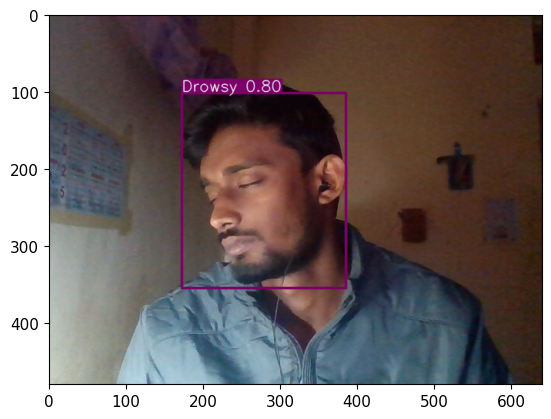

In [20]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [21]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\MR ASISH/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\MR ASISH/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\MR ASISH/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\MR ASISH/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\MR ASISH/.cache\torch\hub\ultralytics_yolov